# 4 Classification
## 4.6 Lab: Logistic Regression, LDA, QDA, and KNN
### 4.6.1 The Stock Market Data
We will begin by examining some numerical and graphical summaries of the Smarket data, which is part of the ISLR library. This data set consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, Lag1 through Lag5. We have also recorded Volume (the number of shares traded on the previous day, in billions), Today (the percentage return on the date in question) and Direction (whether the market was Up or Down on this date).

In [ ]:
library(ISLR)
names(Smarket)
dim(Smarket)
summary(Smarket)

The cor() function produces a matrix that contains all of the pairwise correlations among the predictors in a data set. The first command below gives an error message because the Direction variable is qualitative.

In [3]:
cor(Smarket)
cor(Smarket [,-9])

ERROR: Error in cor(Smarket): 'x' must be numeric


As one would expect, the correlations between the lag variables and to- day’s returns are close to zero. In other words, there appears to be little correlation between today’s returns and previous days’ returns. The only substantial correlation is between Year and Volume. By plotting the data we see that Volume is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

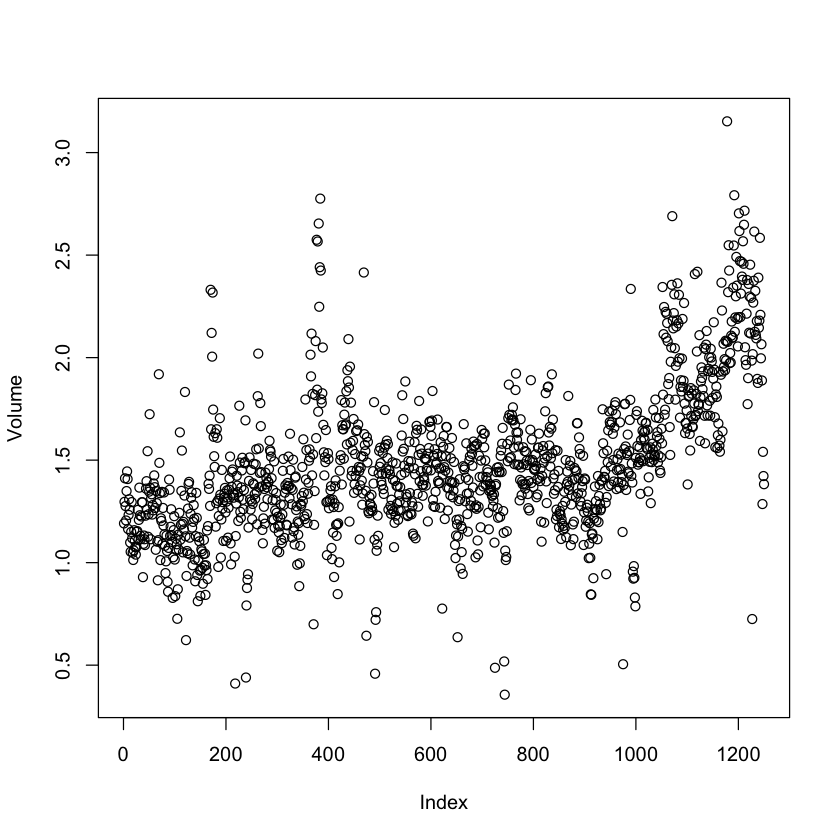

In [4]:
attach(Smarket)
plot(Volume)

### 4.6.2 Logistic Regression
Next, we will fit a logistic regression model in order to predict Direction
using Lag1 through Lag5 and Volume. The glm() function fits generalized linear models, a class of models that includes logistic regression. The syntax of the glm() function is similar to that of lm(), except that we must pass in the argument family=binomial in order to tell R to run a logistic regression
rather than some other type of generalized linear model.

In [5]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial)
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


The smallest p-value here is associated with Lag1. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between Lag1 and Direction.
We use the coef() function in order to access just the coefficients for this fitted model. We can also use the summary() function to access particular aspects of the fitted model, such as the p-values for the coefficients.

In [6]:
coef(glm.fits)
summary(glm.fits)$coef
summary(glm.fits)$coef[,4]

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

Estimate     Std. Error z value    Pr(>|z|) 
(Intercept) -0.126000257 0.24073574 -0.5233966 0.6006983
Lag1        -0.073073746 0.05016739 -1.4565986 0.1452272
Lag2        -0.042301344 0.05008605 -0.8445733 0.3983491
Lag3         0.011085108 0.04993854  0.2219750 0.8243333
Lag4         0.009358938 0.04997413  0.1872757 0.8514445
Lag5         0.010313068 0.04951146  0.2082966 0.8349974
Volume       0.135440659 0.15835970  0.8552723 0.3924004

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

The predict() function can be used to predict the probability that the market will go up, given values of the predictors. The type="response" option tells R to output probabilities of the form P(Y = 1|X), as opposed to other information such as the logit. If no data set is supplied to the predict() function, then the probabilities are computed for the training data that was used to fit the logistic regression model. Here we have printed only the first ten probabilities. We know that these values correspond to the probability of the market going up, rather than down, because the contrasts() function indicates that R has created a dummy variable with a 1 for Up.

In [7]:
glm.probs=predict(glm.fits,type="response")
glm.probs[1:10]
contrasts(Direction)

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

Up
Down 0 
Up   1

In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, Up or Down. The following two commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5.

In [8]:
glm.pred=rep("Down",1250)
glm.pred[glm.probs>.5]="Up"

The first command creates a vector of 1,250 Down elements. The second line transforms to Up all of the elements for which the predicted probability of a market increase exceeds 0.5. Given these predictions, the table() function can be used to produce a confusion matrix in order to determine how many observations were correctly or incorrectly classified.

In [9]:
table(glm.pred,Direction)
(507+145)/1250
mean(glm.pred==Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

[1] 0.5216

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions. The mean() function can be used to compute the fraction of days for which the prediction was correct. In this case, logistic regression correctly predicted the movement of the market 52.2 % of the time.
At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1, 250 observa- tions. In other words, 100 − 52.2 = 47.8 % is the training error rate. As we have seen previously, the training error rate is often overly optimistic—it tends to underestimate the test error rate. In order to better assess the ac- curacy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in prac- tice we will be interested in our model’s performance not on the data that we used to fit the model, but rather on days in the future for which the market’s movements are unknown.
table()

To implement this strategy, we will first create a vector corresponding to the observations from 2001 through 2004. We will then use this vector to create a held out data set of observations from 2005.

In [10]:
train=(Year<2005)
Smarket.2005=Smarket[!train,]
dim(Smarket.2005)
Direction.2005=Direction[!train]

[1] 252   9

The object train is a vector of 1,250 elements, corresponding to the ob- servations in our data set. The elements of the vector that correspond to observations that occurred before 2005 are set to TRUE, whereas those that correspond to observations in 2005 are set to FALSE. The object train is a Boolean vector, since its elements are TRUE and FALSE. Boolean vectors can be used to obtain a subset of the rows or columns of a matrix. For instance, the command Smarket[train,] would pick out a submatrix of the stock market data set, corresponding only to the dates before 2005, since those are the ones for which the elements of train are TRUE. The ! symbol can be used to reverse all of the elements of a Boolean vector. That is, !train is a vector similar to train, except that the elements that are TRUE in train get swapped to FALSE in !train, and the elements that are FALSE in train get swapped to TRUE in !train. Therefore, Smarket[!train,] yields a submatrix of the stock market data containing only the observations for which train is FALSE—that is, the observations with dates in 2005. The output above indicates that there are 252 such observations.

We now fit a logistic regression model using only the subset of the obser- vations that correspond to dates before 2005, using the subset argument. We then obtain predicted probabilities of the stock market going up for each of the days in our test set—that is, for the days in 2005.

In [11]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")


Notice that we have trained and tested our model on two completely sep- arate data sets: training was performed using only the dates before 2005, and testing was performed using only the dates in 2005. Finally, we com- pute the predictions for 2005 and compare them to the actual movements of the market over that time period.

In [12]:
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

The != notation means not equal to, and so the last command computes the test set error rate. The results are rather disappointing: the test error rate is 52%, which is worse than random guessing! Of course this result is not all that surprising, given that one would not generally expect to be able to use previous days’ returns to predict future market performance. (After all, if it were possible to do so, then the authors of this book would be out striking it rich rather than writing a statistics textbook.)
We recall that the logistic regression model had very underwhelming p- values associated with all of the predictors, and that the smallest p-value, though not very small, corresponded to Lag1. Perhaps by removing the variables that appear not to be helpful in predicting Direction, we can obtain a more effective model. After all, using predictors that have no relationship with the response tends to cause a deterioration in the test error rate (since such predictors cause an increase in variance without a corresponding decrease in bias), and so removing such predictors may in turn yield an improvement. Below we have refit the logistic regression using just Lag1 and Lag2, which seemed to have the highest predictive power in the original logistic regression model.

In [13]:
mean(glm.pred!=Direction.2005)
glm.fits=glm(Direction~Lag1+Lag2,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)
106/(106+76)

[1] 0.5198413

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

[1] 0.5824176

Now the results appear to be more promising: 56 % of the daily movements have been correctly predicted. The confusion matrix suggests that on days when logistic regression predicts that the market will decline, it is only correct 50 % of the time. However, on days when it predicts an increase in the market, it has a 58 % accuracy rate.

Suppose that we want to predict the returns associated with particular values of Lag1 and Lag2. In particular, we want to predict Direction on a day when Lag1 and Lag2 equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and −0.8. We do this using the predict() function.

In [14]:
predict(glm.fits,newdata=data.frame(Lag1=c(1.2,1.5),Lag2=c(1.1,-0.8)),type="response")

1         2 
0.4791462 0.4960939

### 4.6.3 Linear Discriminant Analysis
Now we will perform LDA on the Smarket data. In R, we fit a LDA model using the lda() function, which is part of the MASS library. Notice that the syntax for the lda() function is identical to that of lm(), and to that of glm() except for the absence of the family option. We fit the model using only the observations before 2005.

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

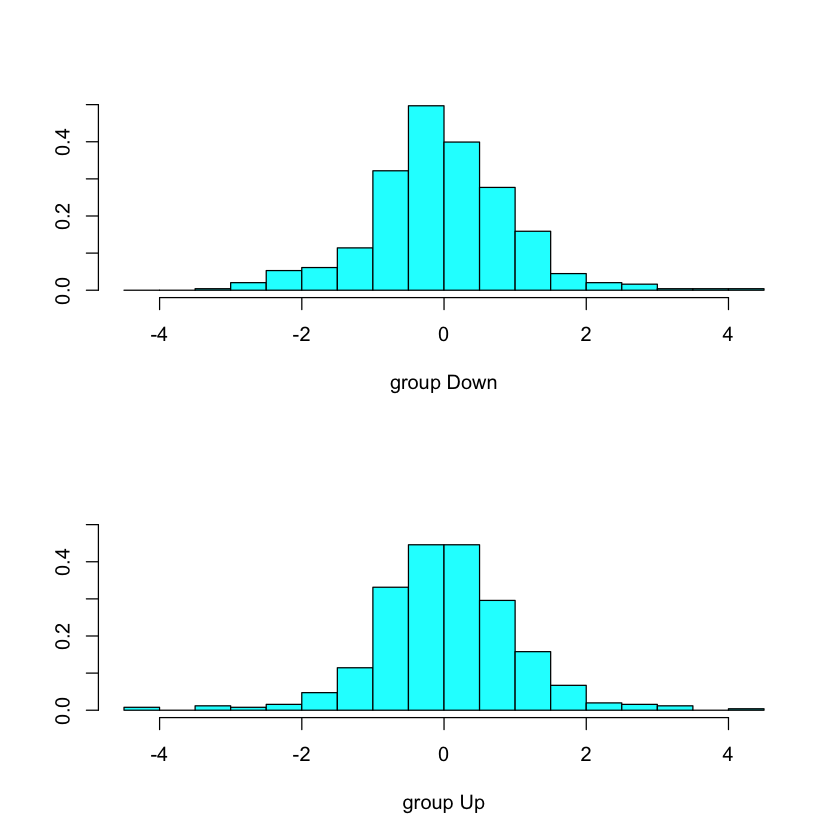

In [15]:
library(MASS)
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket,subset=train)
lda.fit
plot(lda.fit)

The LDA output indicates that πˆ1 = 0.492 and πˆ2 = 0.508; in other words, 49.2% of the training observations correspond to days during which the market went down. It also provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates of μk. These suggest that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines. The coefficients of linear discriminants output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of X = x in (4.19). If −0.642 × Lag1 − 0.514 × Lag2 is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline. The plot() function produces plots of the linear discriminants, obtained by computing −0.642 × Lag1 − 0.514 × Lag2 for each of the training observations.

The predict() function returns a list with three elements. The first ele- ment, class, contains LDA’s predictions about the movement of the market. The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class, computed from (4.10). Finally, x contains the linear discriminants, described earlier.

In [16]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

As we observed in Section 4.5, the LDA and logistic regression predictions are almost identical.

In [ ]:
lda.class=lda.pred$class
table(lda.class,Direction.2005)
mean(lda.class==Direction.2005)


Applying a 50 % threshold to the posterior probabilities allows us to recre- ate the predictions contained in lda.pred$class.

In [ ]:
sum(lda.pred$posterior[,1]>=.5)
sum(lda.pred$posterior[,1]<.5)


Notice that the posterior probability output by the model corresponds to the probability that the market will decrease:

In [ ]:
lda.pred$posterior[1:20,1]
lda.class[1:20]


If we wanted to use a posterior probability threshold other than 50% in order to make predictions, then we could easily do so. For instance, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day—say, if the posterior probability is at least 90 %.

In [ ]:
sum(lda.pred$posterior[,1]>.9)

No days in 2005 meet that threshold! In fact, the greatest posterior prob- ability of decrease in all of 2005 was 52.02 %.

### 4.6.4 Quadratic Discriminant Analysis
We will now fit a QDA model to the Smarket data. QDA is implemented in R using the qda() function, which is also part of the MASS library. The syntax is identical to that of lda().

In [ ]:
qda.fit=qda(Direction~Lag1+Lag2,data=Smarket,subset=train)
qda.fit


The output contains the group means. But it does not contain the coef- ficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [ ]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class,Direction.2005)
mean(qda.class==Direction.2005)

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accu- racy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

### 4.6.5 K-Nearest Neighbors
We will now perform KNN using the knn() function, which is part of the class library. This function works rather differently from the other model- fitting functions that we have encountered thus far. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, knn() forms predictions using a single command. The function requires four inputs.
1. A matrix containing the predictors associated with the training data, labeled train.X below.
2. A matrix containing the predictors associated with the data for which we wish to make predictions, labeled test.X below.
3. A vector containing the class labels for the training observations, labeled train.Direction below.
4. A value for K, the number of nearest neighbors to be used by the classifier.
We use the cbind() function, short for column bind, to bind the Lag1 and Lag2 variables together into two matrices, one for the training set and the other for the test set.

In [17]:
library(class)
train.X=cbind(Lag1,Lag2)[train,]
test.X=cbind(Lag1,Lag2)[!train,]
train.Direction=Direction[train]


ERROR: Error in library(class): there is no package called ‘class’


Now the knn() function can be used to predict the market’s movement for the dates in 2005. We set a random seed before we apply knn() because if several observations are tied as nearest neighbors, then R will randomly break the tie. Therefore, a seed must be set in order to ensure reproducibil- ity of results.

In [ ]:
set.seed(1)
knn.pred=knn(train.X,test.X,train.Direction,k=1)
table(knn.pred,Direction.2005)
(83+43)/252


The results using K = 1 are not very good, since only 50 % of the observa- tions are correctly predicted. Of course, it may be that K = 1 results in an overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [18]:
knn.pred=knn(train.X,test.X,train.Direction,k=3)
table(knn.pred,Direction.2005)
mean(knn.pred==Direction.2005)

ERROR: Error in eval(expr, envir, enclos): could not find function "knn"


The results have improved slightly. But increasing K further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.

### 4.6.6 An Application to Caravan Insurance Data
Finally, we will apply the KNN approach to the Caravan data set, which is part of the ISLR library. This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is Purchase, which indicates whether or not a given individual purchases a caravan insurance policy. In this data set, only 6% of people purchased caravan insurance.

In [ ]:
dim(Caravan)
attach(Caravan)
summary(Purchase)
348/5822

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. For instance, imagine a data set that contains two variables, salary and age (measured in dollars and years, respectively). As far as KNN is concerned, a difference of 1,000 in salary is enormous compared to a difference of 50 years in age. Conse- quently, salary will drive the KNN classification results, and age will have almost no effect. This is contrary to our intuition that a salary difference of $1, 000 is quite small compared to an age difference of 50 years. Further- more, the importance of scale to the KNN classifier leads to another issue: if we measured salary in Japanese yen, or if we measured age in minutes, then we’d get quite different classification results from what we get if these two variables are measured in dollars and years.

A good way to handle this problem is to standardize the data so that all variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale. The scale() function does just this. In standardizing the data, we exclude column 86, because that is the qualitative Purchase variable.

In [ ]:
standardized.X=scale(Caravan[,-86])
var(Caravan[,1])
var(Caravan[,2])
var(standardized.X[,1])
var(standardized.X[,2])


Now every column of standardized.X has a standard deviation of one and a mean of zero.
We now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations.
We fit a KNN model on the training data using K = 1, and evaluate its performance on the test data.

In [ ]:
test=1:1000
train.X=standardized.X[-test,]
test.X=standardized.X[test,]
train.Y=Purchase[-test]
test.Y=Purchase[test]
set.seed(1)
knn.pred=knn(train.X,test.X,train.Y,k=1)
mean(test.Y!=knn.pred)
mean(test.Y!="No")


The vector test is numeric, with values from 1 through 1,000. Typing standardized.X[test,] yields the submatrix of the data containing the ob- servations whose indices range from 1 to 1, 000, whereas typing standardized.X[-test,] yields the submatrix containing the observations whose indices do not range from 1 to 1, 000. The KNN error rate on the 1,000 test observations is just under 12%. At first glance, this may ap- pear to be fairly good. However, since only 6% of customers purchased insurance, we could get the error rate down to 6 % by always predicting No regardless of the values of the predictors!

Suppose that there is some non-trivial cost to trying to sell insurance to a given individual. For instance, perhaps a salesperson must visit each potential customer. If the company tries to sell insurance to a random selection of customers, then the success rate will be only 6%, which may be far too low given the costs involved. Instead, the company would like to try to sell insurance only to customers who are likely to buy it. So the overall error rate is not of interest. Instead, the fraction of individuals that are correctly predicted to buy insurance is of interest.

It turns out that KNN with K = 1 does far better than random guessing among the customers that are predicted to buy insurance. Among 77 such customers, 9, or 11.7 %, actually do purchase insurance. This is double the rate that one would obtain from random guessing.

In [ ]:
table(knn.pred,test.Y)
9/(68+9)


Using K = 3, the success rate increases to 19 %, and with K = 5 the rate is 26.7 %. This is over four times the rate that results from random guessing. It appears that KNN is finding some real patterns in a difficult data set!

In [ ]:
knn.pred=knn(train.X,test.X,train.Y,k=3)
table(knn.pred,test.Y)
5/26
knn.pred=knn(train.X,test.X,train.Y,k=5)
table(knn.pred,test.Y)
4/15


As a comparison, we can also fit a logistic regression model to the data. If we use 0.5 as the predicted probability cut-off for the classifier, then we have a problem: only seven of the test observations are predicted to purchase insurance. Even worse, we are wrong about all of these! However, we are not required to use a cut-off of 0.5. If we instead predict a purchase any time the predicted probability of purchase exceeds 0.25, we get much better results: we predict that 33 people will purchase insurance, and we are correct for about 33% of these people. This is over five times better than random guessing!

In [ ]:
glm.fits=glm(Purchase~.,data=Caravan,family=binomial,subset=-test)
glm.probs=predict(glm.fits,Caravan[test,],type="response")
glm.pred=rep("No",1000)
glm.pred[glm.probs>.5]="Yes"
table(glm.pred,test.Y)
glm.pred=rep("No",1000)
glm.pred[glm.probs>.25]="Yes"
table(glm.pred,test.Y)
11/(22+11)